In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
# Load 20 year seasonal means
celtic_amm15_ds = xr.open_dataset( "amm15_cross-shelf_u_1996-2015_season-mean.nc" )
celtic_amm75_ds = xr.open_dataset( 
    "amm75_cross-shelf_u_1996-2015_season-mean.nc"
).sel(section="Celtic Sea")
celtic_amm15_ds = celtic_amm15_ds.rename({"__xarray_dataarray_variable__":"velocity"})
celtic_amm75_ds = celtic_amm75_ds.rename({"__xarray_dataarray_variable__":"velocity"})

In [3]:
# Paper Figure 5
def Fig5_plot_season( velocity_1, velocity_2, v_min, v_max ):
    
    color_ls = ['tab:blue', 'tab:orange']
    labels_ls = ["a)","b)","c)","d)"]
    
    fig = plt.figure(figsize=(7.5,2.25), dpi=300)
    gs = gridspec.GridSpec( 1, 4, width_ratios=[1,1,1,1], figure=fig, wspace=0.05, hspace=0.05)
    
    for plot_i, season in enumerate( ["DJF","MAM","JJA","SON"] ):
        ax = fig.add_subplot(gs[0,plot_i])
        ax.plot( [0,0], [0,200], "k:" )
        ax.plot( velocity_1.sel( season=season )*100, velocity_1.z_dim, 
                    label="AMM15\n1.5 km", color=color_ls[0] )
        ax.plot( velocity_2.sel( season=season )*100, velocity_2.z_dim, 
                    label="AMM75\n7.5 km", color=color_ls[1] )
        
        ax.set_title(season, fontsize=10, loc='center')
        ax.text(0.02, 0.98, labels_ls[plot_i],
                transform=ax.transAxes,
                fontsize=10, 
                fontweight='bold',
                verticalalignment='top',
                horizontalalignment='left')
        ax.invert_yaxis()
    
        if plot_i != 0:
            ax.set_yticklabels([])
        else:
            ax.set_ylabel('depth [m]', fontsize='medium') 
            #ax.text(-0.35, 0.9, "7.5 km",
            #    transform=ax.transAxes,
            #    fontsize=10, 
            #    fontweight='bold',
            #    verticalalignment='top',
            #    horizontalalignment='left')

        ax.set_xlim(v_min, v_max)
        ax.set_xticks( np.arange(-np.ceil(np.abs(v_min))+0.5, np.ceil(v_max), 0.5) )
        #ax.set_xticklabels([])
        plt.xticks(rotation=45)
        plt.grid(linestyle=':', linewidth=0.2)
        
        # legend
        if plot_i==3:
            ax.legend(bbox_to_anchor=(0.54, 0.41), framealpha=1, fontsize=8)
    
        plt.rcParams['text.antialiased'] = True
        plt.figtext(0.5, -0.12, 'velocity [cm/s]', ha='center', fontsize='medium', fontweight=300,fontfamily='sans-serif')
    return fig

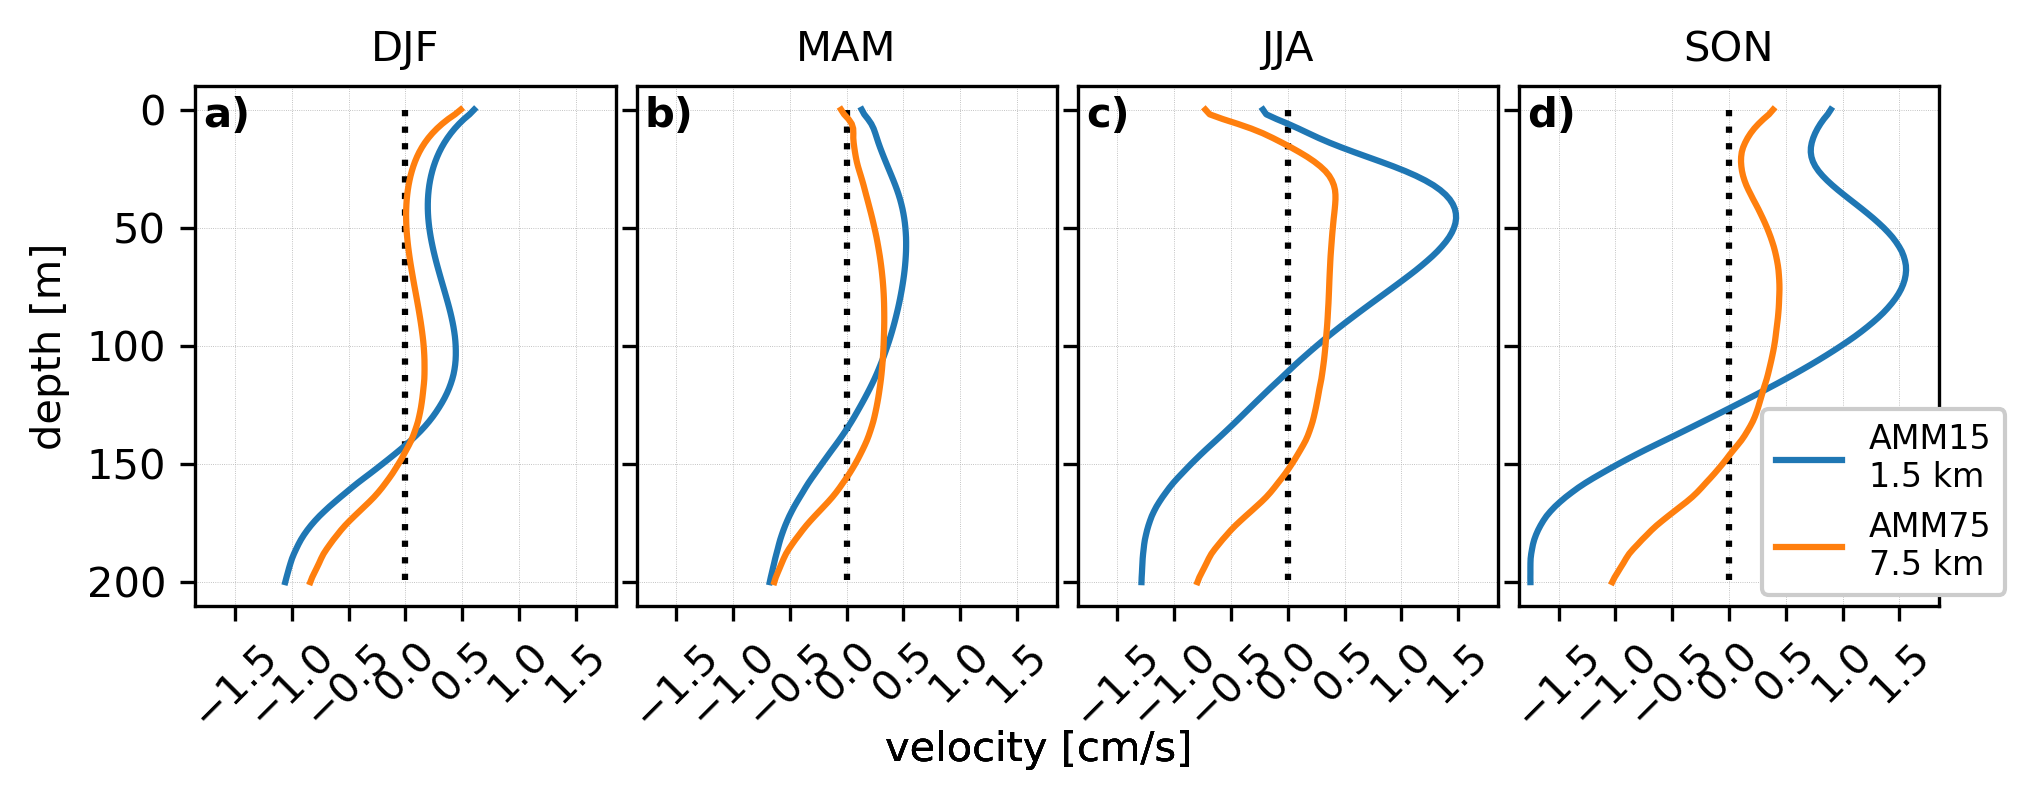

In [4]:
fig = Fig5_plot_season( celtic_amm15_ds.velocity, celtic_amm75_ds.velocity, -1.85, 1.85 )
#fig.savefig("/home/users/anwise/PISCES/FIGS/Fig3_celtic_season_20yr_amm15_amm75.jpg", dpi=300, bbox_inches='tight')

In [5]:
# Load 20 year mean
mean_amm15_ds = xr.open_dataset( "amm15_cross-shelf_u_1996-2015_mean.nc" )
mean_amm75_ds = xr.open_dataset( "amm75_cross-shelf_u_1996-2015_mean.nc" )
mean_amm15_ds = mean_amm15_ds.rename({"__xarray_dataarray_variable__":"velocity"})
mean_amm75_ds = mean_amm75_ds.rename({"__xarray_dataarray_variable__":"velocity"})

In [6]:
# Figure 4 of the paper
def Fig4_plot_mean_sections( velocity_1, velocity_2, v_min, v_max ):
    
    color_ls = ['tab:blue', 'tab:orange']
    labels_ls = ["a)","b)","c)","d)","e)"]
    titles_ls = ["Celtic-Armorican", "Porcupine", "Rockell", "Faroe-Shetland", "Norwegian trench"]
    
    fig = plt.figure(figsize=(10.5,2.25), dpi=300)
    gs = gridspec.GridSpec( 1, 5, width_ratios=[1,1,1,1,1], figure=fig, wspace=0.05, hspace=0.05)
    
    for plot_i, section in enumerate( velocity_1.section ):
        ax = fig.add_subplot(gs[0,plot_i])
        ax.plot( [0,0], [0,200], "k:" )
        ax.plot( velocity_1.sel( section=section )*100, velocity_1.z_dim, 
                    label="AMM15\n1.5 km", color=color_ls[0] )
        ax.plot( velocity_2.isel( section=plot_i )*100, velocity_2.z_dim, 
                    label="AMM75\n7.5 km", color=color_ls[1] )
        ax.set_title(titles_ls[plot_i], fontsize=10, loc='center')
        ax.text(0.02, 0.98, labels_ls[plot_i],
                transform=ax.transAxes,
                fontsize=10, 
                fontweight='bold',
                verticalalignment='top',
                horizontalalignment='left')
        ax.invert_yaxis()
    
        if plot_i != 0:
            ax.set_yticklabels([])
        else:
            ax.set_ylabel('depth [m]', fontsize='medium') 
            #ax.text(-0.35, 0.9, "7.5 km",
            #    transform=ax.transAxes,
            #    fontsize=10, 
            #    fontweight='bold',
            #    verticalalignment='top',
            #    horizontalalignment='left')
            
        ax.set_xlim(v_min, v_max)
        ax.set_xticks( np.arange(-np.ceil(np.abs(v_min))+0.5, np.ceil(v_max), 0.5) )
        #ax.set_xticklabels([])
        plt.xticks(rotation=45)
        plt.grid(linestyle=':', linewidth=0.2)
        
        # legend
        if plot_i==4:
            ax.legend(bbox_to_anchor=(0.5, 0.5), framealpha=1, fontsize=8)
    
        plt.rcParams['text.antialiased'] = True
        plt.figtext(0.5, -0.12, 'velocity [cm/s]', ha='center', fontsize='medium', fontweight=300,fontfamily='sans-serif')
    return fig

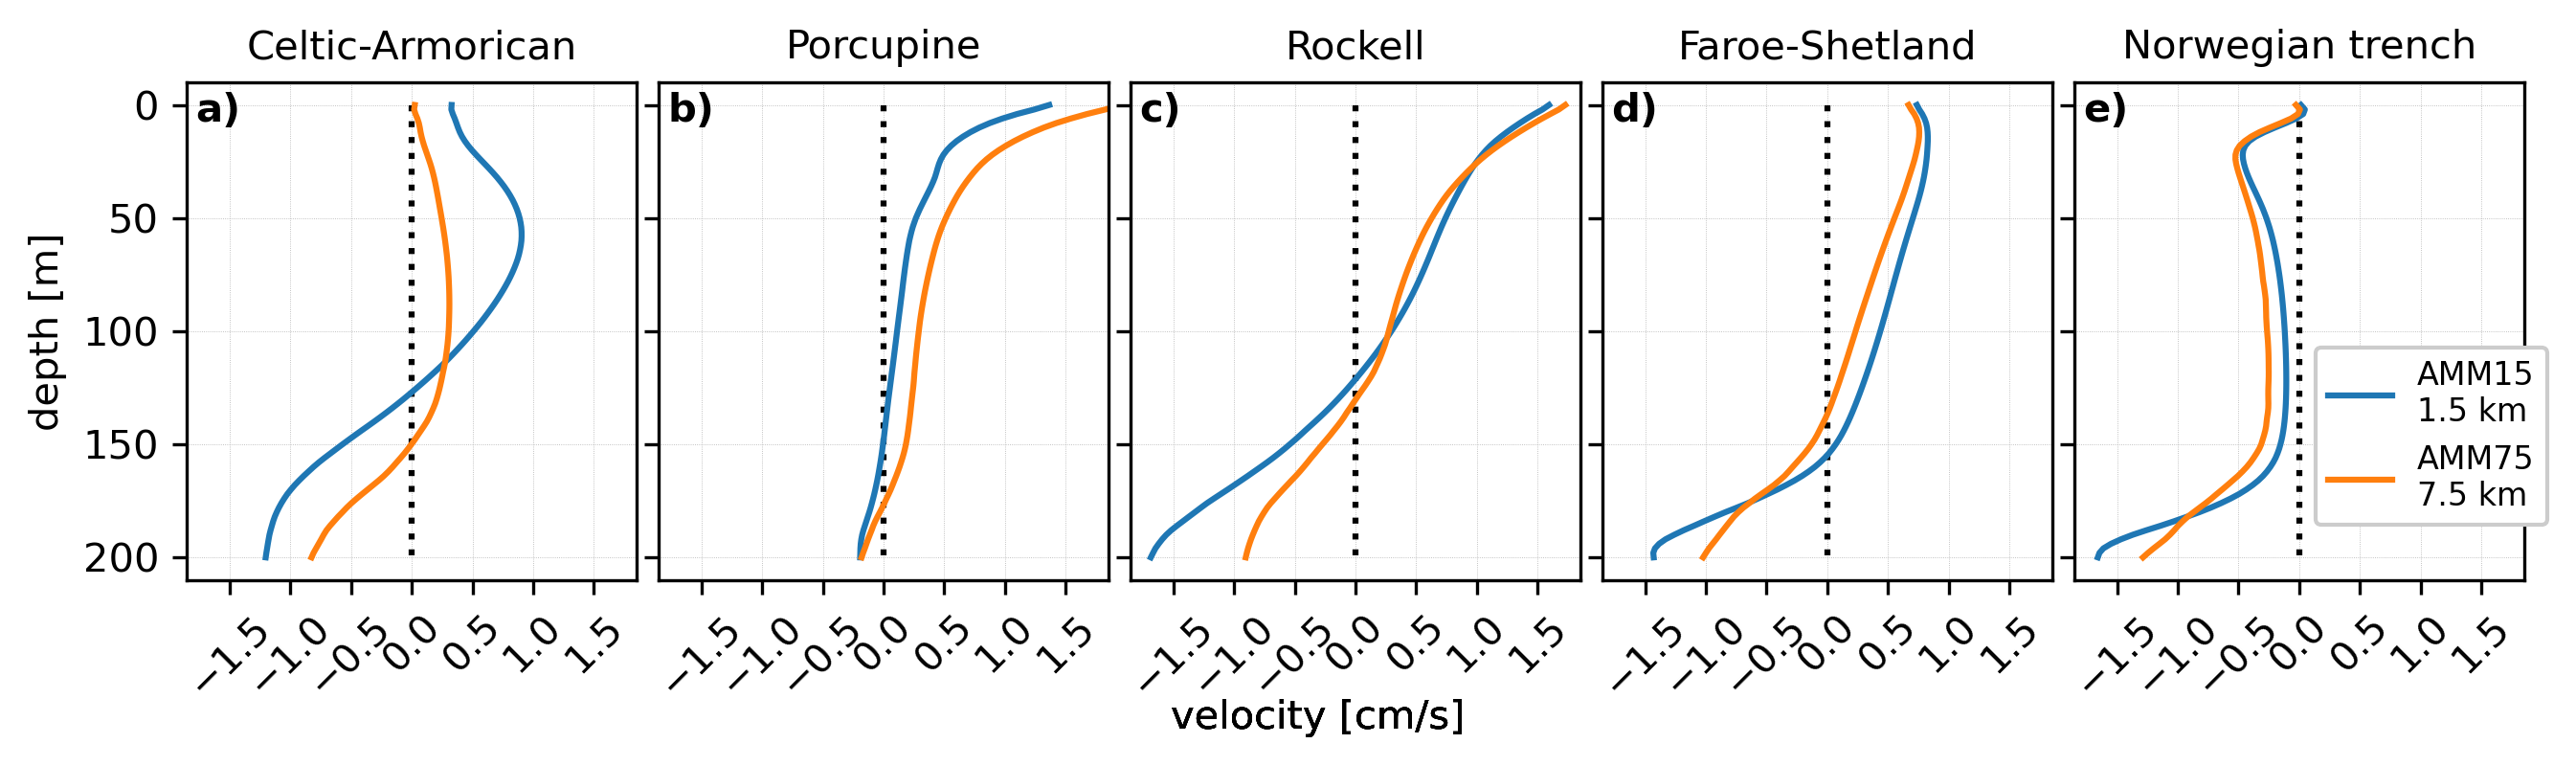

In [7]:
fig = Fig4_plot_mean_sections( mean_amm15_ds.velocity, mean_amm75_ds.velocity, -1.85, 1.85 )
#fig.savefig("/home/users/anwise/PISCES/FIGS/Fig2_mean_20yr_amm15_amm75.jpg", dpi=300, bbox_inches='tight')